# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data with Pandas.
df = pd.read_csv('/college_completion.csv')

# 2. What are are the dimensions of the data? How many observations are there? What are the variables included?
# Use .head() to examine the first few rows of data.
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
df.shape

(3798, 63)

In [ ]:
# 3. Cross tabulate control and level. Describe the patterns you see.
pd.crosstab(df['level'], df['control'])


# The majority of colleges are 4 year, private not-for profit institutions. Followed by public 2-year institutions, then public 4-year.
# Most colleges are 4-year programs.

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


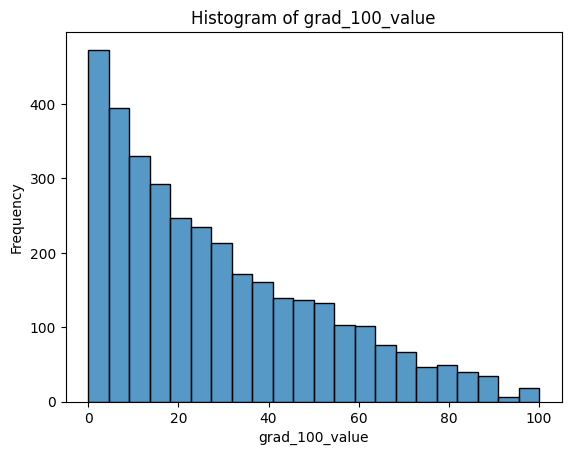

In [ ]:
# 4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

sns.histplot(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Histogram of grad_100_value')
plt.show()

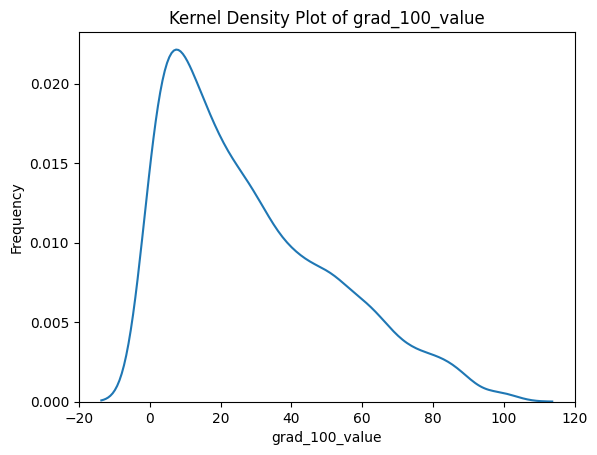

In [ ]:
sns.kdeplot(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

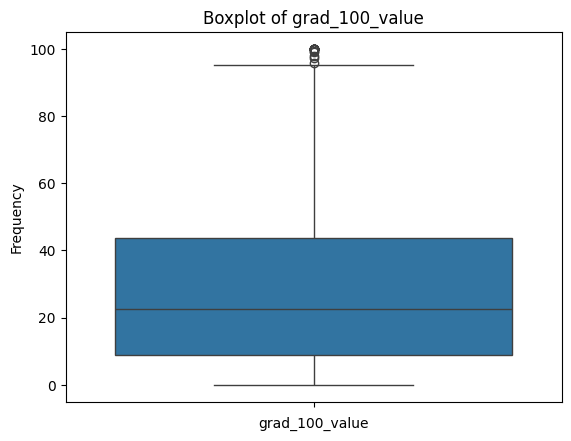

In [ ]:
sns.boxplot(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Boxplot of grad_100_value')
plt.show()

In [ ]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


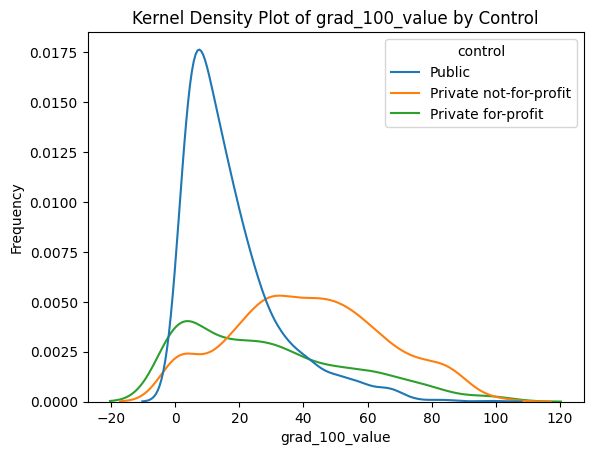

In [ ]:
# 5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see.
sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.show()


# ANALYSIS: Public institutions have the lowest grad_100_value, signified by the high peak lower on the graph (around 15%). Private not-for-profits,
# however, have a higher rate with a more regularly distributed curve averaging aroud 40%.

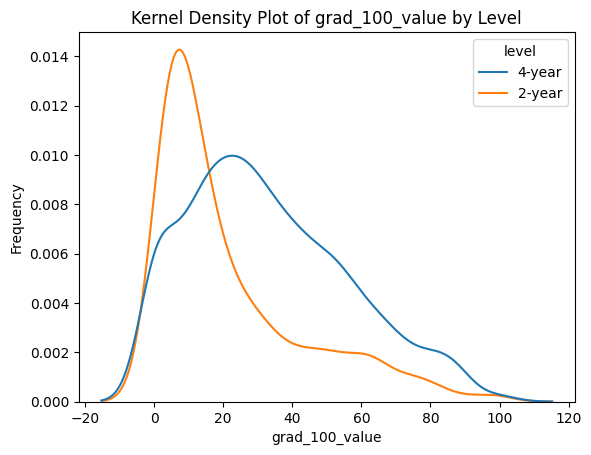

In [ ]:
sns.kdeplot(data=df, x='grad_100_value', hue='level')
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.show()

# ANALYSIS: 2-year programs have a lower grad_100_value compared to 4-year programs.

In [ ]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?
df.loc[:,['grad_100_value','level']].groupby('level').describe()

# ANALYSIS: 4-year institutions appear to have a better graduation rate than 2-year institutions (by approximately 10%).
# This is in line with the kernel density plot.

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [ ]:
df.loc[:,['grad_100_value','control']].groupby('control').describe()

# ANALYSIS: Similar to the analysis of the kernel density plot, the private not-for-profit institutions have the highest graduation rates at 41%,
# whereas public institutions have the lowest at 17%. Private for-profit institutions are in the middle at 29%.

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

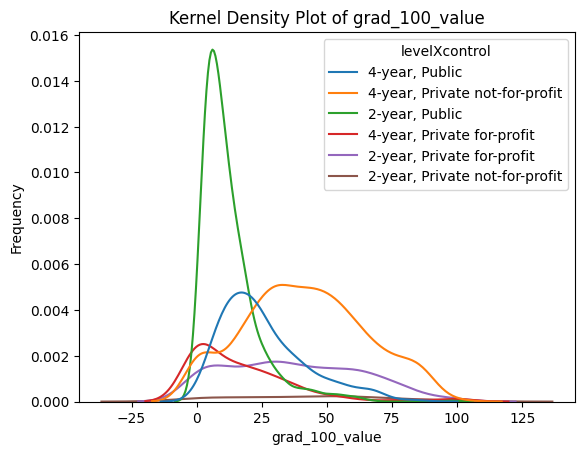

In [ ]:
# 6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
# Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

df['levelXcontrol']=df['level']+', '+df['control']

sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

# ANALYSIS: Private not-for-profit institutions seem to have the best graduation rates, with both 2 and 4 year programs showing comparable rates.
# 2-year public institutions have a strikingly lower graduation rate than the other colleges.

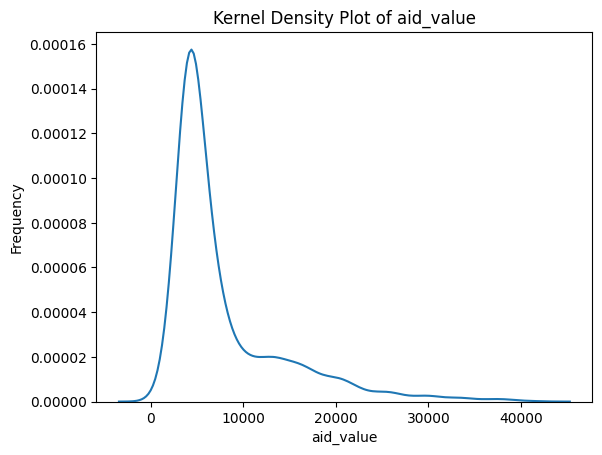

In [ ]:
# 7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph?
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

sns.kdeplot(data=df, x='aid_value')
plt.xlabel('aid_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of aid_value')
plt.show()

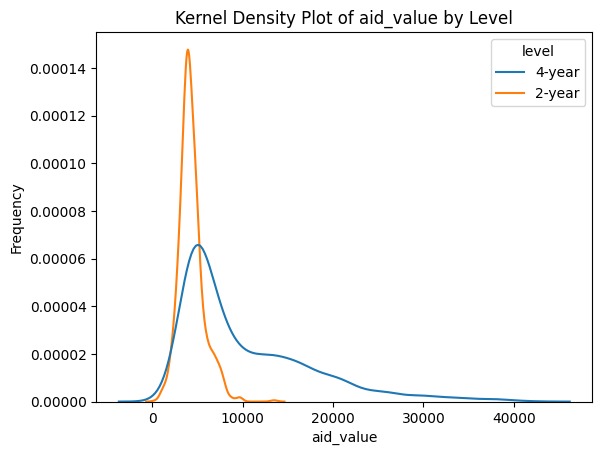

In [ ]:
sns.kdeplot(data=df, x='aid_value', hue='level')
plt.xlabel('aid_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of aid_value by Level')
plt.show()

In [ ]:
df.loc[:,['aid_value','level']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

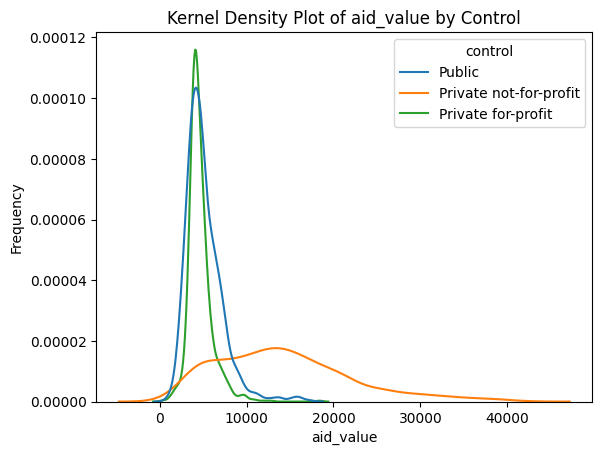

In [ ]:
sns.kdeplot(data=df, x='aid_value', hue='control')
plt.xlabel('aid_value')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of aid_value by Control')
plt.show()

# ANALYSIS: this graph shows that private, not-for-profit institutions give a notably large amount of aid than both public and private for-profit
# institutions, who offer similar levels of aid. In the previous kernel density plot, it is evident that 4-year institutions also offer a larger amount
# of aid than 2-year programs.

In [ ]:
df.loc[:,['aid_value','control']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

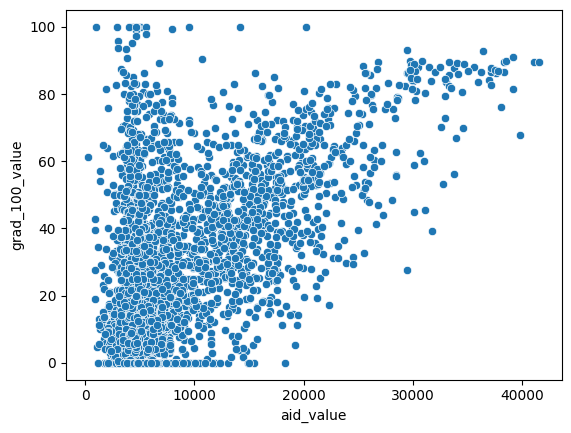

In [ ]:
# 8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control.
# Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

sns.scatterplot(data=df, x='aid_value', y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

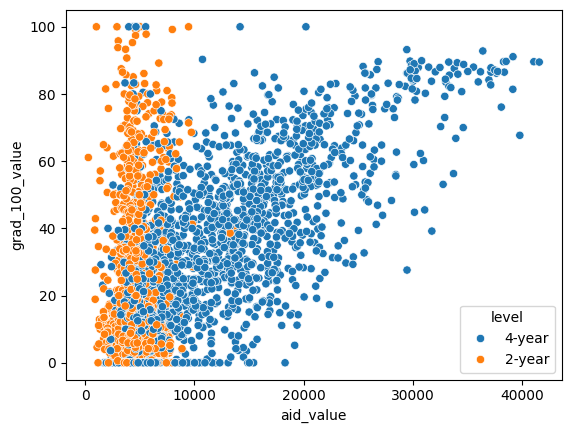

In [ ]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

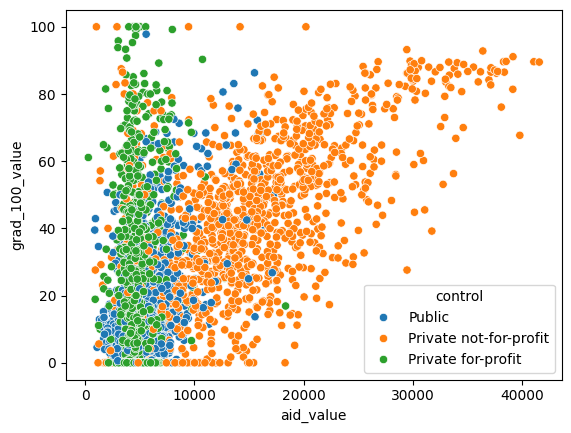

In [ ]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')

# ANALYSIS: from these graphs, it is evident that aid increases graduation rates most for 4-year private, not-for-profit institutions. This is shown by
# the positive slope in the graphs, as aid in value increases, so does graduation rate.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

med_dataset = pd.read_csv('/content/DSD_MCD_RY24_P06_V20_D22_BGM.csv')
med_dataset.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,Outlier_Flag_2018,...,Avg_Spnd_Per_Clm_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22,CAGR_Avg_Spnd_Per_Dsg_Unt_18_22
0,A & D,Vitamins A And D,1,Overall,252.22,36845.0,84.0,0.006845,3.002619,1.0,...,9.760000,1.0,129.83,5884.5,17,0.022063,7.637059,1,0.356607,0.339881
1,A & D,Vitamins A And D,1,Schering-Plough,252.22,36845.0,84.0,0.006845,3.002619,1.0,...,9.760000,1.0,129.83,5884.5,17,0.022063,7.637059,1,-0.205675,0.339881
2,A And D,Vits A And D/White Pet/Lanolin,1,Overall,213.70,2113.7,28.0,0.101102,7.632143,1.0,...,7.603571,1.0,286.30,1113.5,17,0.257117,16.841176,1,1.494382,0.262823
3,A And D,Vits A And D/White Pet/Lanolin,1,Bayer Healthcar,213.70,2113.7,28.0,0.101102,7.632143,1.0,...,7.603571,1.0,286.30,1113.5,17,0.257117,16.841176,1,1.494382,0.262823
4,A And D Diaper Rash,"Dimethic/Zinc Ox/Vits A,D/Aloe",1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,3.192381,1.0,45.45,1365.5,25,0.033285,1.818000,1,-0.392151,-0.234385


In [ ]:
# 2. Does the data dictionary document how missings are handled? For categorical variables,
# does it describe the possible values and missing value codes? For the numeric variables,
# does it describe how missing values are handled? Summarize your opinion of the data dictionary.


# The data dictionary does not discuss how missing values are handled for either categorical or numerical variables.
# It also does not discuss the possible values for categorical variables. The data dictionary only incldudes
# the name of the variable and a brief description of the variable. While this is partially helpful, it would be
# more useful if the dictionary had more detail on how to interpret certain variables (especially numerical variables)
# and what the codings for each variable actually mean.

In [ ]:
# 3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables,
# documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [2]:
med_dataset.isnull().sum()

,0
Brnd_Name,0
Gnrc_Name,0
Tot_Mftr,0
Mftr_Name,0
Tot_Spndng_2018,4918
Tot_Dsg_Unts_2018,4918
Tot_Clms_2018,4918
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,4918
Avg_Spnd_Per_Clm_2018,4918
Outlier_Flag_2018,4918


In [3]:
# subset the' dataset by only the columns that we're interested in
fav_cols = ['Brnd_Name', 'Gnrc_Name', 'Tot_Mftr', 'Mftr_Name', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021','Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']
med = med_dataset.filter(fav_cols)
med.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Clms_2018,Tot_Clms_2019,Tot_Clms_2020,Tot_Clms_2021,Tot_Spndng_2018,Tot_Spndng_2019,Tot_Spndng_2020,Tot_Spndng_2021
0,A & D,Vitamins A And D,1,Overall,84.0,121.0,41.0,26.0,252.22,770.31,322.51,253.76
1,A & D,Vitamins A And D,1,Schering-Plough,84.0,121.0,41.0,26.0,252.22,770.31,322.51,253.76
2,A And D,Vits A And D/White Pet/Lanolin,1,Overall,28.0,17.0,19.0,14.0,213.70,79.36,138.49,106.45
3,A And D,Vits A And D/White Pet/Lanolin,1,Bayer Healthcar,28.0,17.0,19.0,14.0,213.70,79.36,138.49,106.45
4,A And D Diaper Rash,"Dimethic/Zinc Ox/Vits A,D/Aloe",1,Overall,NaN,15.0,27.0,21.0,NaN,90.59,204.19,67.04


In [4]:
med['Brnd_Name'].value_counts()

,count
Brnd_Name,
Fenofibrate,50
Levetiracetam*,46
Ondansetron HCl*,36
Potassium Chloride*,36
Glycopyrrolate*,35
...,...
Humalog Mix 50-50 Kwikpen,2
Humalog Mix 75-25,2
Humalog Mix 75-25 Kwikpen,2


In [5]:
# Tot_Clms_2018 (and 2019,2021,2022)
  # I think it could be interesting to compare the total amount of prescriptions filled for different kinds of drugs.
  # Which drug is the most/least common? How has this changed over time, especially during the years of covid?

med.loc[:,['Tot_Clms_2018']].describe()

,Tot_Clms_2018
count,1.154100e+04
mean,1.169182e+05
std,5.690588e+05
min,1.100000e+01
25%,5.820000e+02
50%,4.167000e+03
75%,3.249600e+04
max,1.408623e+07


In [6]:
# Tot_Mftr -- how many manufacturers are there for each drug, how does this relate to their total claims?
med['Tot_Mftr'].value_counts()

,count
Tot_Mftr,
1,15156
2,354
3,160
4,119
5,85
6,79
7,74
9,57
8,56


In [7]:
# Mftr_Name -- how do different manufacturers compare?
med['Mftr_Name'].value_counts()

# what does Overall mean in this column??? -- data dictionary does not specify this. Also, why do certain manufacturers have an asterisk

,count
Mftr_Name,
Overall,4331
Teva USA,276
Mylan,259
Sandoz,251
Major Pharmaceu,249
...,...
Nobelpharma Ame,1
Hospira/Pfizer-,1
Ani Pharmaceuti*,1


In [8]:
# section out the top manufacturers for analysis later on

n = 10
med['Mftr_Name'].value_counts()[:n].index.tolist()

['Overall',
 'Teva USA',
 'Mylan',
 'Sandoz',
 'Major Pharmaceu',
 'Ahp',
 'Amneal Pharmace',
 'Aurobindo Pharm',
 'Northstar Rx Ll',
 'Actavis/Teva']

In [9]:
top_5_manufacturers = ['Teva USA', 'Mylan', 'Sandoz', 'Major Pharmaceu', 'Ahp']
top_10_manufacturers = ['Teva USA', 'Mylan', 'Sandoz', 'Major Pharmaceu', 'Ahp', 'Amneal Pharmace', 'Auronbindo Pharm', 'Northstar Rx Ll', 'Actavis/Teva']

In [10]:
# Tot_Spndng_2018 -- how does the aggregate drug spending for the Medicaid program differ by year? does this vary by manufacturer or claims?
med['Tot_Spndng_2018'].describe()

,Tot_Spndng_2018
count,1.154100e+04
mean,1.143308e+07
std,5.607631e+07
min,0.000000e+00
25%,6.378463e+04
50%,5.169236e+05
75%,3.138594e+06
max,1.397360e+09


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


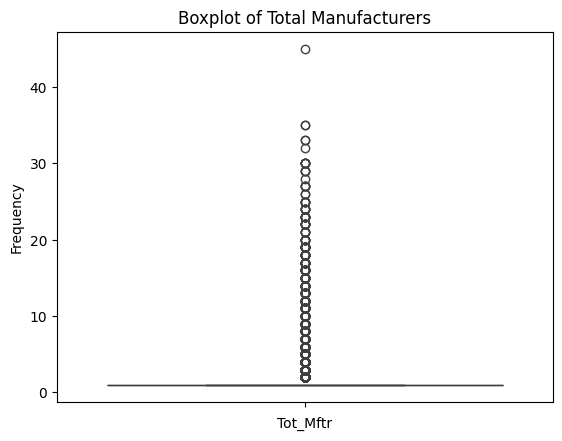

In [11]:
# 4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable.
# Do you see any outliers?
sns.boxplot(med['Tot_Mftr'])
plt.xlabel('Tot_Mftr')
plt.ylabel('Frequency')
plt.title('Boxplot of Total Manufacturers')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

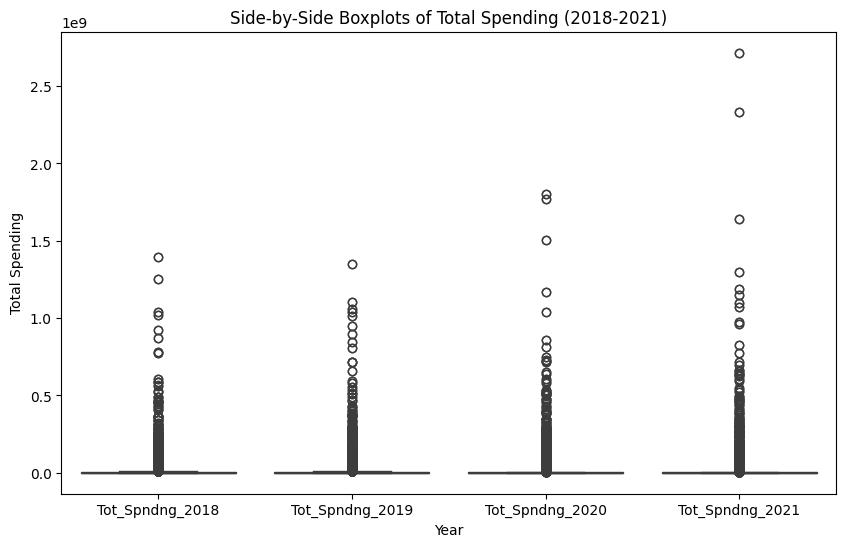

In [12]:
# Used Google Colab's AI
  # prompt: make side by side boxplots for total spending in 2018, 2019, and 2020

spending_columns = ['Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']

# Create a list of the columns to plot
columns_to_plot = [col for col in spending_columns if col in med.columns]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side boxplots
sns.boxplot(data=med[columns_to_plot], ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Spending')
ax.set_title('Side-by-Side Boxplots of Total Spending (2018-2021)')

# Display the plot
plt.show()

In [ ]:
!pip install --upgrade seaborn

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

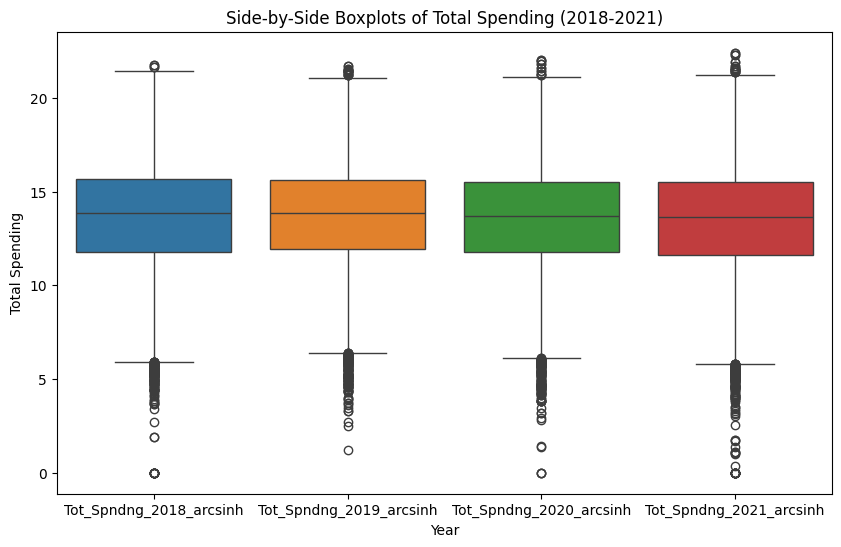

In [13]:
# lots of outliers and the graph is very skewed, smooth out using the inverse hyperbolic sine
med['Tot_Spndng_2018_arcsinh'] = np.arcsinh(med['Tot_Spndng_2018'])
med['Tot_Spndng_2019_arcsinh'] = np.arcsinh(med['Tot_Spndng_2019'])
med['Tot_Spndng_2020_arcsinh'] = np.arcsinh(med['Tot_Spndng_2020'])
med['Tot_Spndng_2021_arcsinh'] = np.arcsinh(med['Tot_Spndng_2021'])

spending_columns = ['Tot_Spndng_2018_arcsinh', 'Tot_Spndng_2019_arcsinh', 'Tot_Spndng_2020_arcsinh', 'Tot_Spndng_2021_arcsinh']

# Create a list of the columns to plot
columns_to_plot = [col for col in spending_columns if col in med.columns]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side boxplots
sns.boxplot(data=med[columns_to_plot], ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Spending')
ax.set_title('Side-by-Side Boxplots of Total Spending (2018-2021)')

# Display the plot
plt.show()


In [14]:
# still a lot of outliers, remove some

med = med.loc[med['Tot_Spndng_2018_arcsinh']>6,:]
med = med.loc[med['Tot_Spndng_2019_arcsinh']>7,:]
med = med.loc[med['Tot_Spndng_2020_arcsinh']>6,:]
med = med.loc[med['Tot_Spndng_2021_arcsinh']>6,:]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

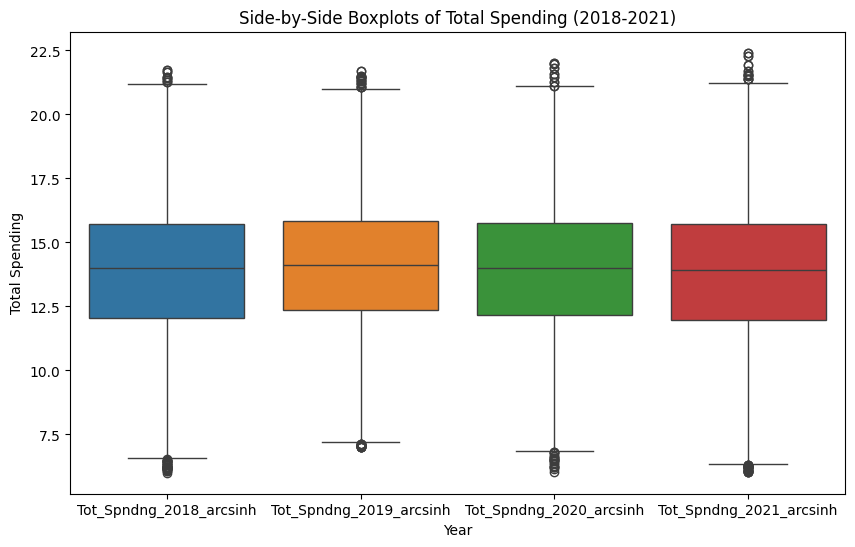

In [16]:
# Create a list of the columns to plot
columns_to_plot = [col for col in spending_columns if col in med.columns]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=med[columns_to_plot], ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Spending')
ax.set_title('Side-by-Side Boxplots of Total Spending (2018-2021)')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

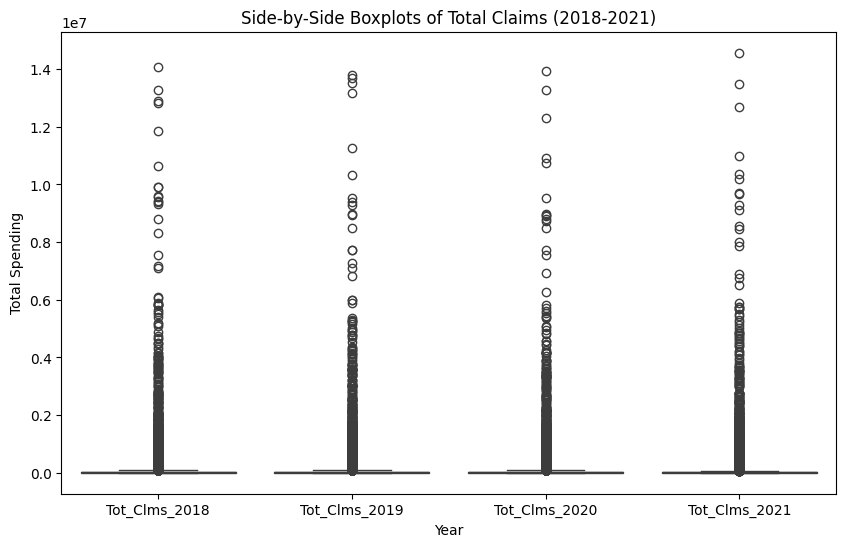

In [17]:
claims_columns = ['Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']

# Create a list of the columns to plot
columns_to_plot = [col for col in claims_columns if col in med.columns]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side boxplots
sns.boxplot(data=med[columns_to_plot], ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Spending')
ax.set_title('Side-by-Side Boxplots of Total Claims (2018-2021)')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

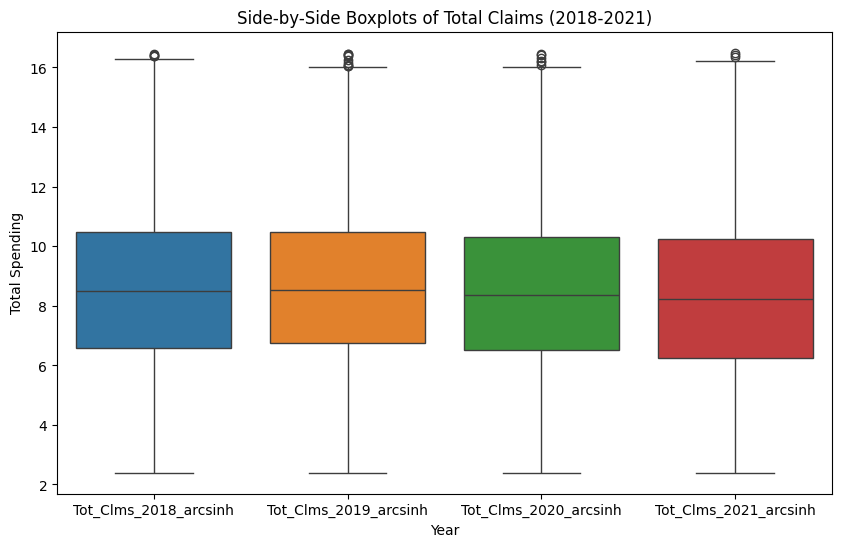

In [18]:
# lots of outliers and the graph is very skewed, smooth out using the inverse hyperbolic sine
med['Tot_Clms_2018_arcsinh'] = np.log(med['Tot_Clms_2018'])
med['Tot_Clms_2019_arcsinh'] = np.log(med['Tot_Clms_2019'])
med['Tot_Clms_2020_arcsinh'] = np.log(med['Tot_Clms_2020'])
med['Tot_Clms_2021_arcsinh'] = np.log(med['Tot_Clms_2021'])

claims_columns = ['Tot_Clms_2018_arcsinh', 'Tot_Clms_2019_arcsinh', 'Tot_Clms_2020_arcsinh', 'Tot_Clms_2021_arcsinh']

# Create a list of the columns to plot
columns_to_plot = [col for col in claims_columns if col in med.columns]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side boxplots
sns.boxplot(data=med[columns_to_plot], ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Spending')
ax.set_title('Side-by-Side Boxplots of Total Claims (2018-2021)')

# Display the plot
plt.show()


In [ ]:
# 5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

In [20]:
import math
n_bins = round(math.sqrt(len(med)))

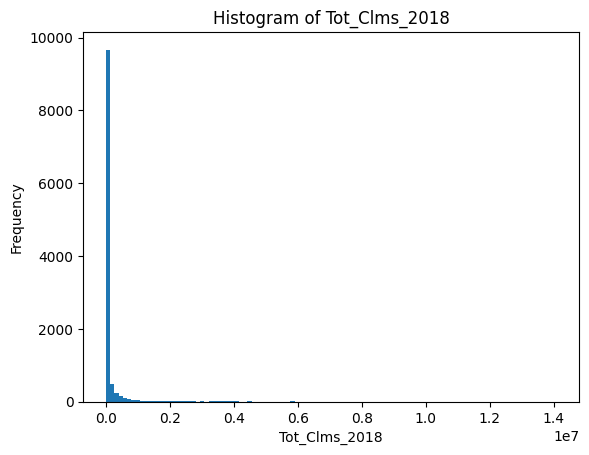

In [21]:
med['Tot_Clms_2018'].hist(bins = n_bins, grid=False)
plt.xlabel('Tot_Clms_2018')
plt.ylabel('Frequency')
plt.title('Histogram of Tot_Clms_2018')
plt.show()

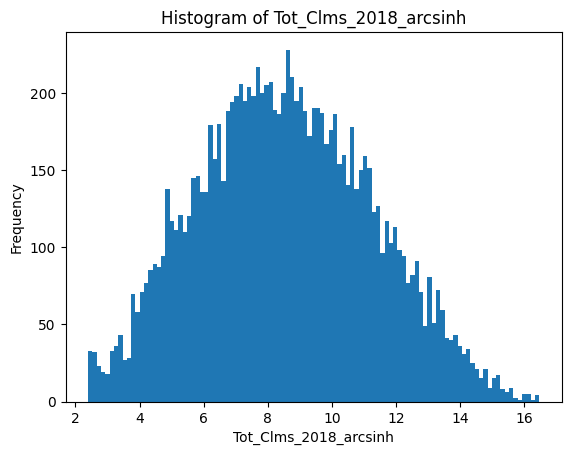

In [22]:
# rescale using the inverse hyperbolic sine
med.loc[med['Tot_Clms_2018_arcsinh']>0,'Tot_Clms_2018_arcsinh'].hist(bins=n_bins, grid=False)
plt.xlabel('Tot_Clms_2018_arcsinh')
plt.ylabel('Frequency')
plt.title('Histogram of Tot_Clms_2018_arcsinh')
plt.show()

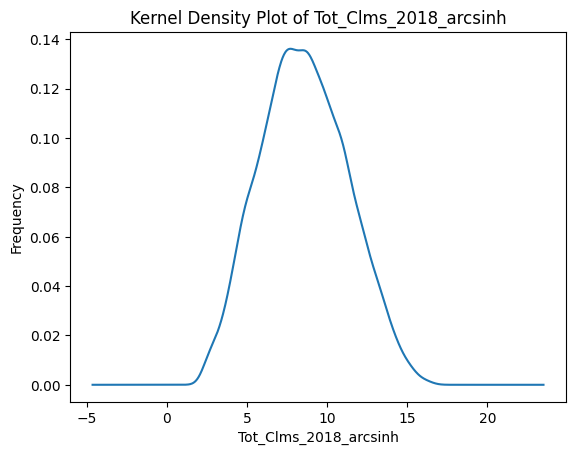

In [23]:
# kernel density plot version -- way easier to read
med['Tot_Clms_2018_arcsinh'].plot.density()
plt.xlabel('Tot_Clms_2018_arcsinh')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of Tot_Clms_2018_arcsinh')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


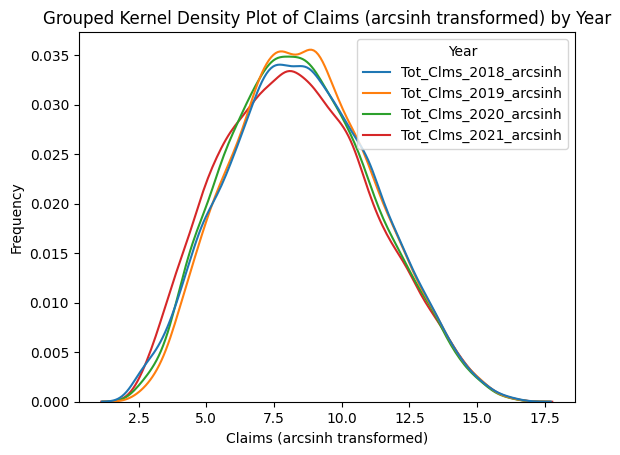

In [24]:
# Used Google Colab's AI
  # prompt: make a grouped kernel density plot of the arcsinh claims columns

claims_columns = ['Tot_Clms_2018_arcsinh', 'Tot_Clms_2019_arcsinh', 'Tot_Clms_2020_arcsinh', 'Tot_Clms_2021_arcsinh']

# Melt the dataframe to have a single column for the claims and another for the year
med_melted = pd.melt(med, value_vars=claims_columns, var_name='Year', value_name='Claims_arcsinh')

# Create the grouped kernel density plot
sns.kdeplot(data=med_melted, x='Claims_arcsinh', hue='Year')
plt.xlabel('Claims (arcsinh transformed)')
plt.ylabel('Frequency')
plt.title('Grouped Kernel Density Plot of Claims (arcsinh transformed) by Year')
plt.show()


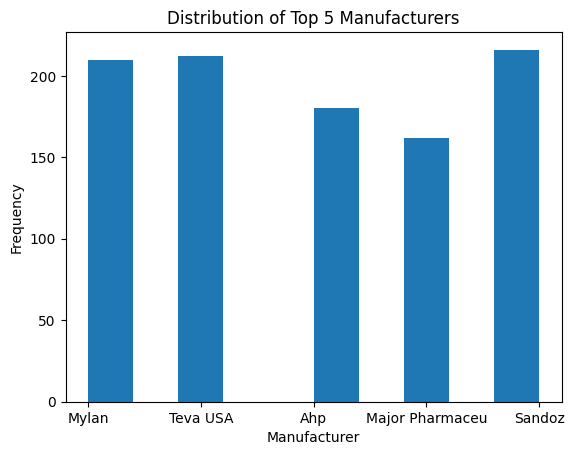

In [25]:
top_5_manufacturers = ['Teva USA', 'Mylan', 'Sandoz', 'Major Pharmaceu', 'Ahp']

med_filtered = med[med['Mftr_Name'].isin(top_5_manufacturers)]

med_filtered['Mftr_Name'].hist(grid=False)
plt.xlabel("Manufacturer")
plt.ylabel("Frequency")
plt.title("Distribution of Top 5 Manufacturers")
plt.show()

<Axes: xlabel='Tot_Clms_2018', ylabel='Tot_Spndng_2018'>

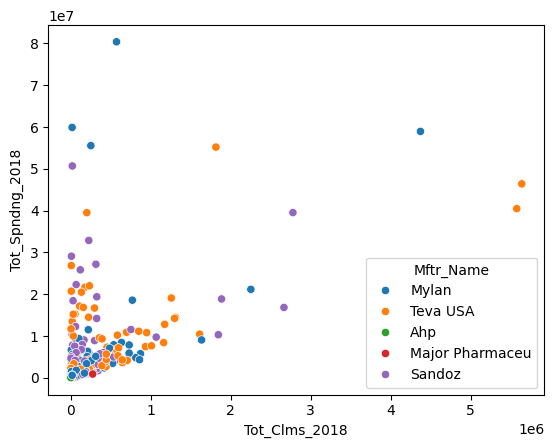

In [26]:
# 6. Create a scatter plot, and describe the relationship you see.

# This scatterplot shows little relationship between the two variables - with most values clustered at low levels of spending and claims.
# The majority of observations seem to be for Teva USA and Mylan, with Ahp having few dots on the plot.
sns.scatterplot(data=med_filtered, x='Tot_Clms_2018', y='Tot_Spndng_2018', hue='Mftr_Name')

<Axes: xlabel='Tot_Clms_2018_arcsinh', ylabel='Tot_Spndng_2018_arcsinh'>

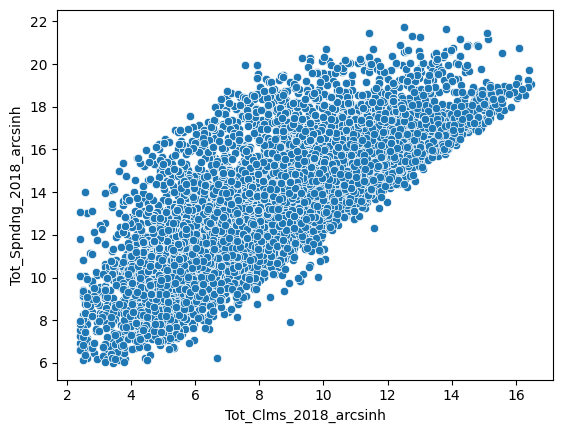

In [27]:
# this scatterplot, rescaled using the inverse hyperbolic sines, shows a more positive relationship between the two variables
sns.scatterplot(data=med, x='Tot_Clms_2018_arcsinh', y='Tot_Spndng_2018_arcsinh')

<Axes: xlabel='Tot_Clms_2018_arcsinh', ylabel='Tot_Spndng_2018_arcsinh'>

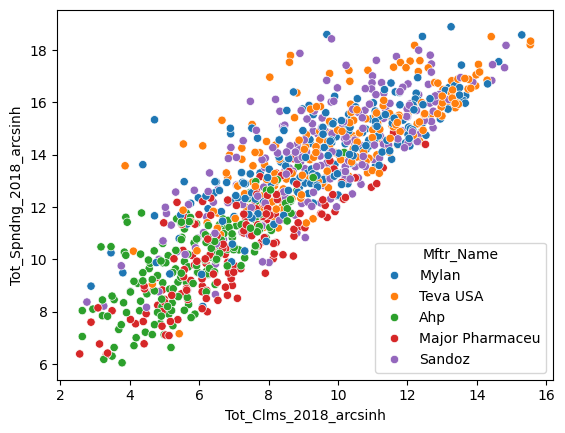

In [28]:
# this scatterplot highlights the top 5 manufacturers by claim and spending in 2018. It shows that Ahp typically had lower claims and spending
# in the arcsinh transformation, whereas manufacturers like Teva USA and Sandoz had higher values. Major Pharmaceau was pretty spread out throughout the levels.
sns.scatterplot(data=med_filtered, x='Tot_Clms_2018_arcsinh', y='Tot_Spndng_2018_arcsinh',hue='Mftr_Name')

In [29]:
# 7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see

# This table compares 5 manufacturers by the total claims in 2018. Teva USA had the highest average number of total claims in 2018, while Ahp had the lowest.
# This remains true when comparing the medians as well. Mylan and Sandoz had comparable average claims and median number of claims in 2018, while Major
# Pharmaceau was on the lower end.
med_filtered.loc[:,['Mftr_Name','Tot_Clms_2018']].groupby('Mftr_Name').describe()

Tot_Clms_2018                                              \
                        count           mean            std   min     25%   
Mftr_Name                                                                   
Ahp                     180.0    1379.372222    3414.301879  14.0   129.5   
Major Pharmaceu         162.0    6902.000000   24990.437812  13.0   322.5   
Mylan                   210.0  121363.761905  383917.178550  18.0  2821.0   
Sandoz                  216.0  108537.958333  335542.258431  16.0  2734.0   
Teva USA                212.0  211294.636792  608246.467925  48.0  4889.0   

                                                
                     50%        75%        max  
Mftr_Name                                       
Ahp                345.0    1127.75    27275.0  
Major Pharmaceu   1035.5    3635.00   273201.0  
Mylan            17586.5   77213.50  4372979.0  
Sandoz           13747.0   61973.25  2777573.0  
Teva USA         31312.5  138647.75  5639945.0